Q24: How clear is it that students' feedback on the course is acted on?
Q25: How well does the students' union (association or guild) represent students' academic interests?
Q14: How often does feedback help you to improve your work?
Q17: How well organised is your course?
Q10: How clear were the marking criteria used to assess your work? 
Q18: How well were any changes to teaching on your course communicated?
Q08: To what extent does your course have the right balance of directed and independent study?
Q23: To what extent are students' opinions about the course valued by staff?
Q26: How well communicated was information about your university/college's mental wellbeing support services?
Q28: Overall, I am satisfied with the quality of the course.
Q13: How often have you received assessment feedback on time?
Q02: How often do teaching staff make the subject engaging?
Q11: How fair has the marking and assessment been on your course? 
Q12: How well have assessments allowed you to demonstr

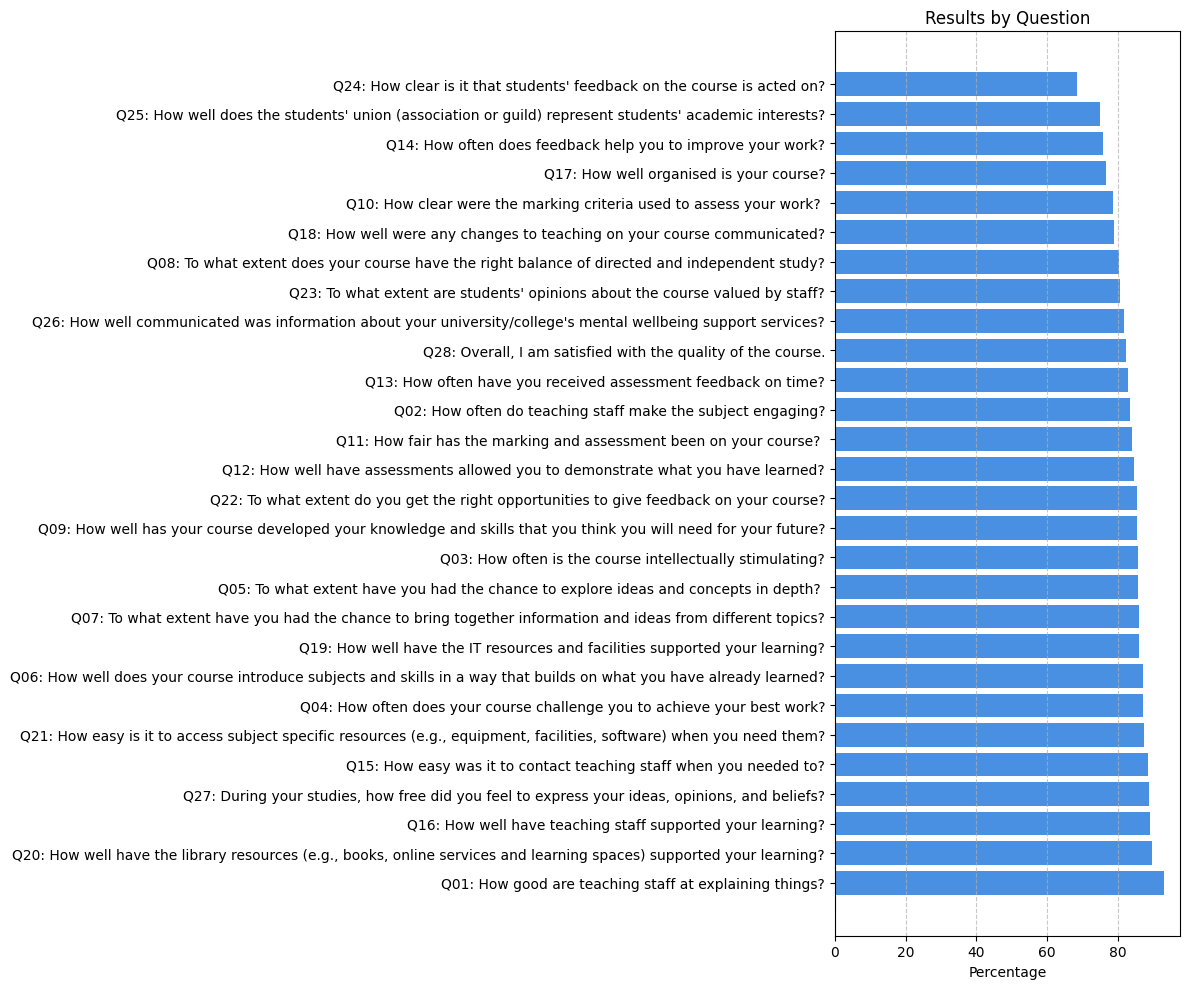

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("nss2025.csv")
# --- YOUR CODE (UNCHANGED) ---
questionToPlot = [] 

answerVaules = []
# Get the list of subjects
totalCha1 = df["cah1_subject"].unique().tolist()

top_10 = (df.groupby('question', as_index=False)
            .agg(mean_agree_pct=('agree_pct', 'mean'))
            .sort_values('mean_agree_pct', ascending=True)
)

    # 3. APPEND to the list
for index, row in top_10.iterrows():
    
                    # The subject name
     
        questionToPlot.append(row['question'])              
        answerVaules.append(row['mean_agree_pct'])   



for x in range(len(top_10)):
    print(questionToPlot[x]) 
# -----------------------------

# --- THE PLOTTING CODE (FIXED) ---



fig, ax = plt.subplots(figsize=(12, 10))

# Use barh for horizontal bars
ax.barh(questionToPlot, answerVaules, color='#4a90e2')

ax.set_xlabel("Percentage")
ax.set_title("Results by Question")
ax.grid(axis='x', linestyle='--', alpha=0.7) # Grid on X axis only
ax.invert_yaxis() # Top question at the top

plt.tight_layout()
plt.show()




plt.show()

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("nss2025.csv")
# --- YOUR CODE (UNCHANGED) ---
questionToPlot = [] 

answerVaules = []
# Get the list of subjects
totalCha1 = df["cah1_subject"].unique().tolist()

top_10 = (df.groupby('question', as_index=False)
            .agg(mean_agree_pct=('benchmark', 'mean'))
            .sort_values('mean_agree_pct', ascending=True)
)

    # 3. APPEND to the list
for index, row in top_10.iterrows():
    
                    # The subject name
     
        questionToPlot.append(row['question'])              
        answerVaules.append(row['mean_agree_pct'])   



for x in range(len(top_10)):
    print(questionToPlot[x]) 
# -----------------------------

# --- THE PLOTTING CODE (FIXED) ---



fig, ax = plt.subplots(figsize=(12, 10))

# Use barh for horizontal bars
ax.barh(questionToPlot, answerVaules, color='#4a90e2')

ax.set_xlabel("Percentage")
ax.set_title("Results by Question")
ax.grid(axis='x', linestyle='--', alpha=0.7) # Grid on X axis only
ax.invert_yaxis() # Top question at the top

plt.tight_layout()
plt.show()






ModuleNotFoundError: No module named 'matplotlib'

In [3]:
Q03: How often is the course intellectually stimulating?




Object `stimulating` not found.


In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("nss2025.csv")
# --- YOUR CODE (UNCHANGED) ---

total_pop = df['population'].sum()
total_res = df['respondents'].sum()


print((total_res/total_pop)*100)


72.8150541908839


                                              provider  population
92                             The University of Leeds        6521
104                          University College London        6428
109                              University of Bristol        6130
116                            University of Edinburgh        6055
117                               University of Exeter        5976
..                                                 ...         ...
46                           Medway School of Pharmacy          76
48                    Northeastern University - London          72
126            University of London Institute in Paris          63
155            Wiltshire College and University Centre          33
58   Richmond, the American International Universit...           6

[152 rows x 2 columns]
Number of providers: 152


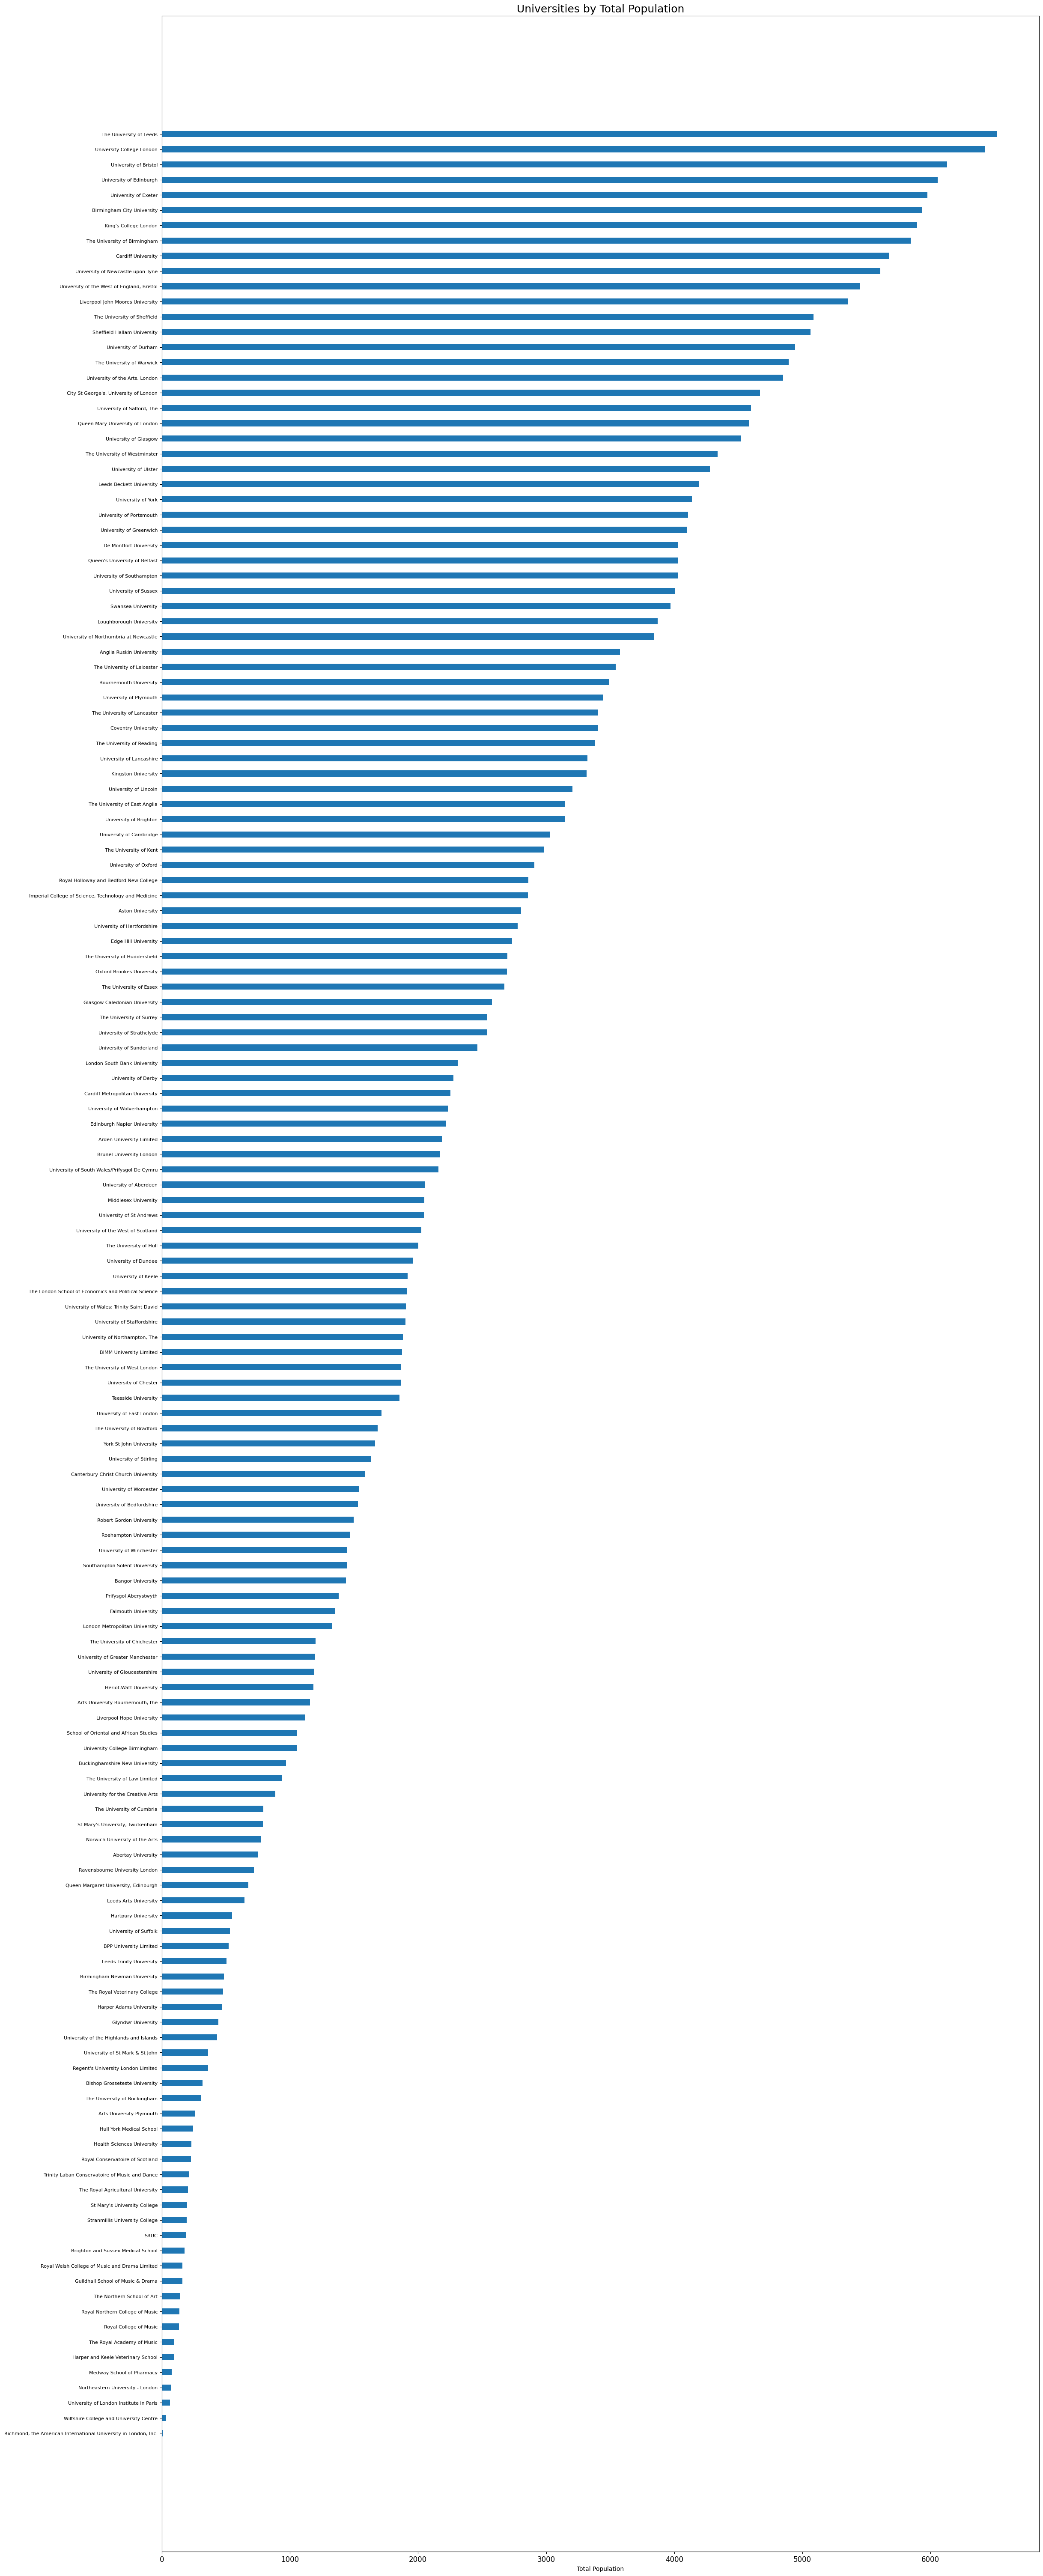

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("onlyUni.csv")

# --- DATA PROCESSING ---

subset = df[['provider', 'cah3_subject', 'population']]


unique_df = subset.drop_duplicates(
    subset=['provider', 'cah3_subject', 'population']
)

# 3. Sum population per provider
provider_population = (
    unique_df
    .groupby('provider', as_index=False)['population']
    .sum()
)

# 4. Sort and exclude top 2 online providers, then take top 10
top_10 = (
    provider_population
    .sort_values('population', ascending=False)
    .iloc[5:]

)

print(top_10)
print("Number of providers:", len(top_10))  # should be 10

# --- PLOTTING ---
num_unis = len(top_10)

fig_height = max(0.4 * num_unis, 20)  # auto-scale height

fig, ax = plt.subplots(figsize=(25, fig_height))

ax.barh(
    top_10['provider'],
    top_10['population'],
    height=0.4
)

ax.set_title("Universities by Total Population", fontsize=18)
ax.set_xlabel("Total Population")
ax.invert_yaxis()

# Improve label readability
ax.tick_params(axis='y', labelsize=8)
ax.tick_params(axis='x', labelsize=12)

plt.tight_layout(pad=3)
plt.show()


521


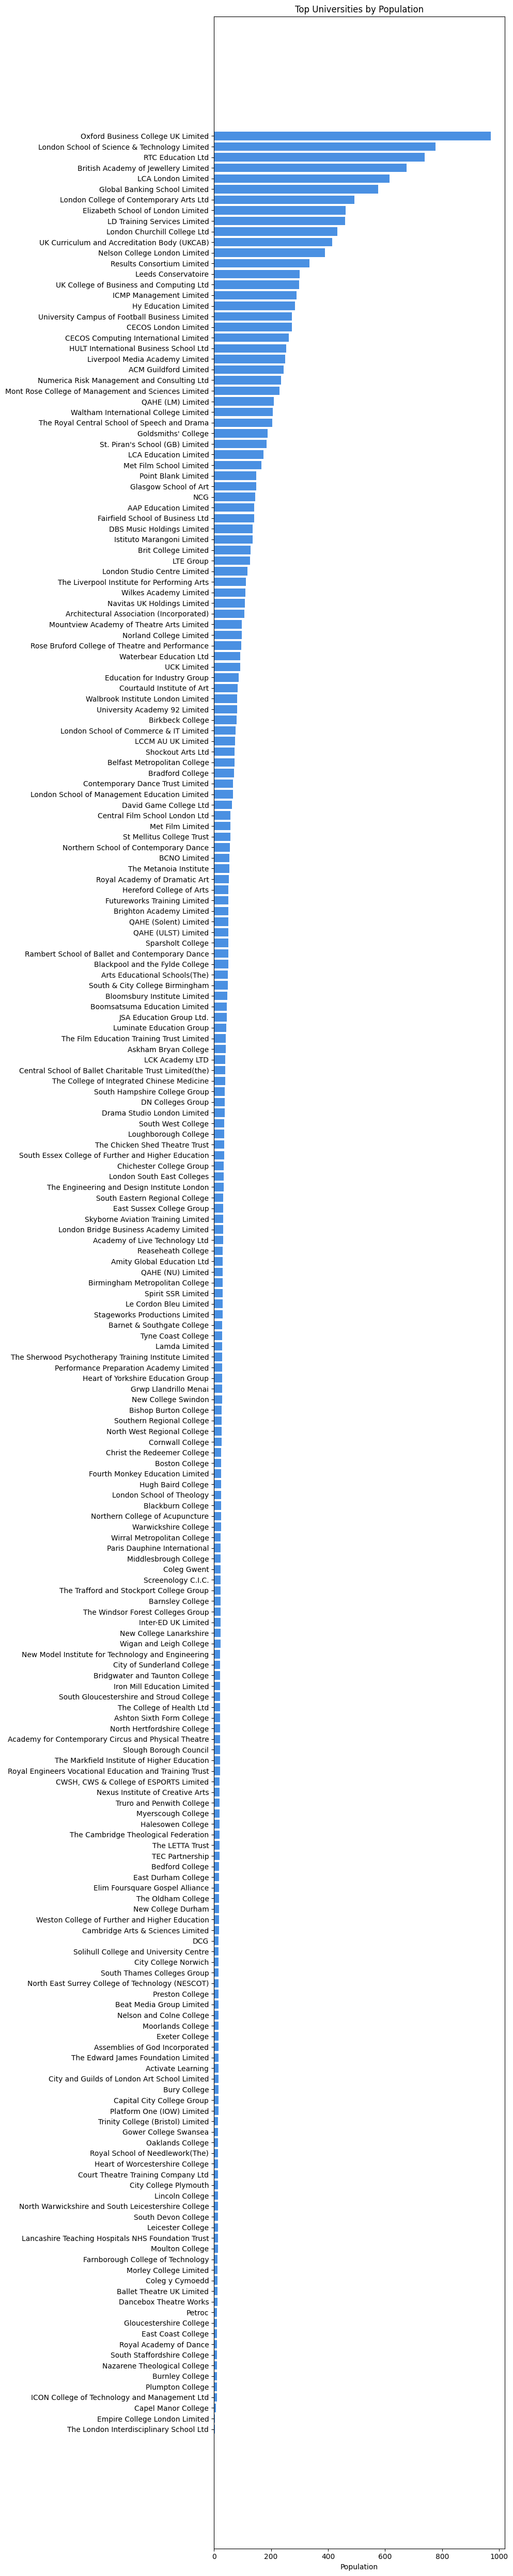

In [3]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("FEHE.csv")

questionToPlot = [] 
answerValues = []

# --- DATA PROCESSING ---

# 1. Select only the columns we need
subset = df[['provider', 'population']]

# 2. Remove duplicates to make it UNIQUE
# This keeps 1 row per provider with their population
unique_df = subset.drop_duplicates()

# 3. Sort by population and take top 10
top_10 = unique_df.sort_values('population', ascending=False).iloc[2:]


# --- LOOP (UNCHANGED) ---
for index, row in top_10.iterrows():
    questionToPlot.append(row['provider'])     
    answerValues.append(row['population'])   

print(len(top_10)) # Should be 10

# --- PLOTTING ---
fig, ax = plt.subplots(figsize=(10, 50))
ax.barh(questionToPlot, answerValues, color='#4a90e2')
plt.title("Top Universities by Population")
ax.set_xlabel("Population")
ax.invert_yaxis()
plt.tight_layout()
plt.show()

#This exlcuudes the 2 ones as they are online school hence more students as there is ,ess people which is needed 





# Each providers and the for piplaution and respondence

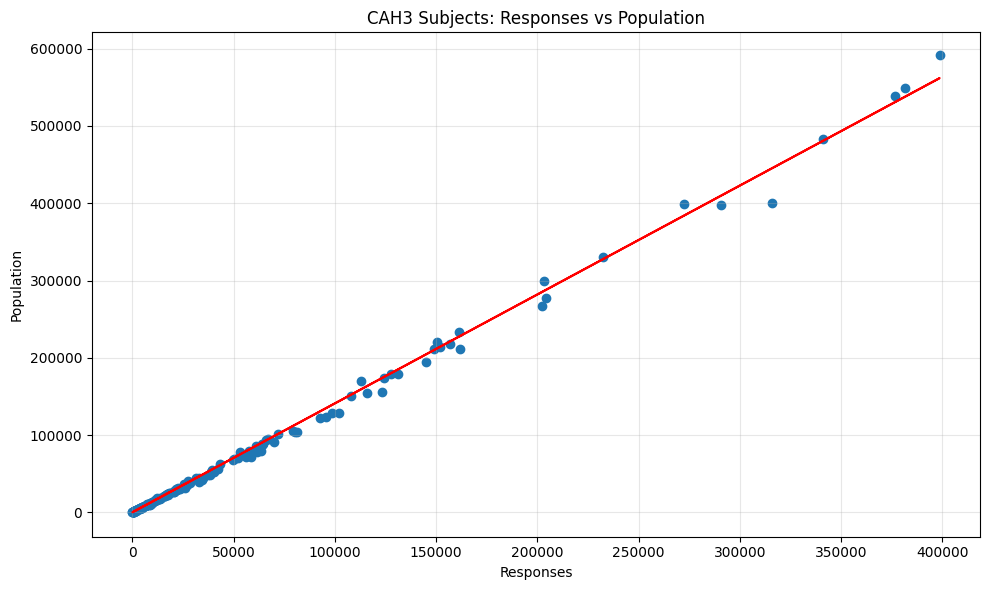

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("nss2025.csv")

# ---- Aggregate by CAH3 subject ----
cah3_summary = (
    df
    .groupby("cah3_subject", as_index=False)
    .agg(
        mean_agree_pct=("benchmark", "mean"),
        population=("population", "sum"),
        responses=("respondents", "sum")
    )
)

# ---- Scatter plot ----
plt.figure(figsize=(10, 6))

plt.scatter(
    cah3_summary["responses"],      # X axis
    cah3_summary["population"],     # Y axis


)

a, b = np.polyfit(cah3_summary["responses"],  cah3_summary["population"], 1)

plt.xlabel("Responses")
plt.ylabel("Population")
plt.title("CAH3 Subjects: Responses vs Population")

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.plot(cah3_summary["responses"], a*cah3_summary["responses"],+b ,color='red') 
plt.show()


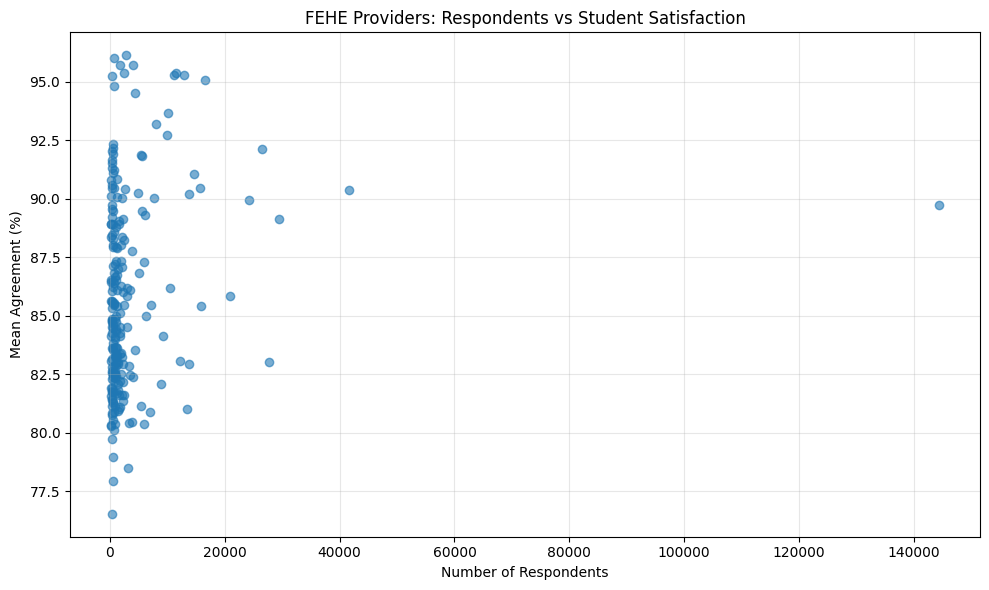

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("FEHE.csv")

# ---- Aggregate by provider ----
provider_summary = (
    df
    .groupby("provider", as_index=False)
    .agg(
        mean_agree_pct=("benchmark", "mean"),
        respondents=("respondents", "sum"),
        population=("population", "sum")
    )
)



# ---- Scatter plot ----
plt.figure(figsize=(10, 6))

plt.scatter(
    provider_summary["respondents"],      # X
    provider_summary["mean_agree_pct"],    # Y
    alpha=0.6
)

plt.xlabel("Number of Respondents")
plt.ylabel("Mean Agreement (%)")
plt.title("FEHE Providers: Respondents vs Student Satisfaction")

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


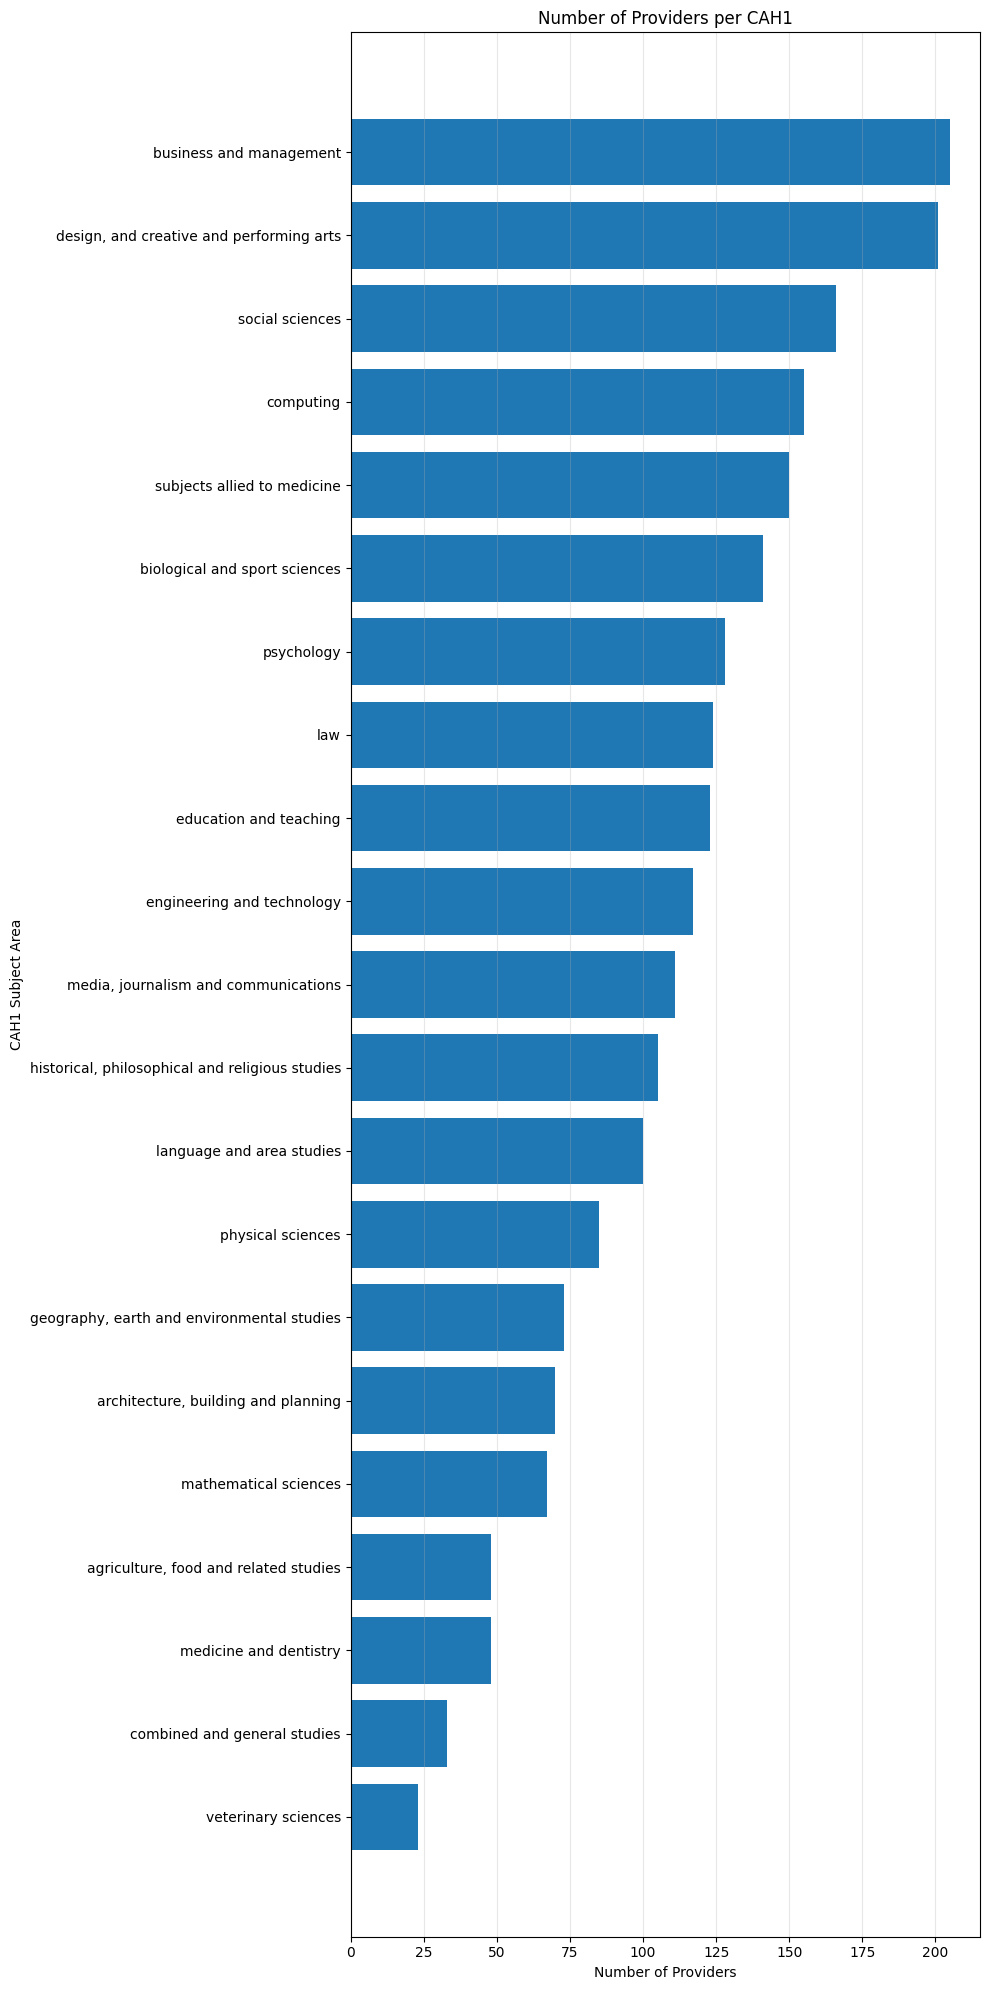

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("nss2025.csv")

# ---- Count number of providers per CAH1 ----
cah1_summary = (
    df
    .groupby(["cah1_code", "cah1_subject"], as_index=False)
    .agg(
        num_providers=("provider", "nunique")
    )
)

# Sort for cleaner plotting
cah1_summary = cah1_summary.sort_values("num_providers", ascending=True)

# ---- Plot ----
plt.figure(figsize=(10, 20))

plt.barh(
    cah1_summary["cah1_subject"],
    cah1_summary["num_providers"]
)

plt.xlabel("Number of Providers")
plt.ylabel("CAH1 Subject Area")
plt.title("Number of Providers per CAH1")

plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()


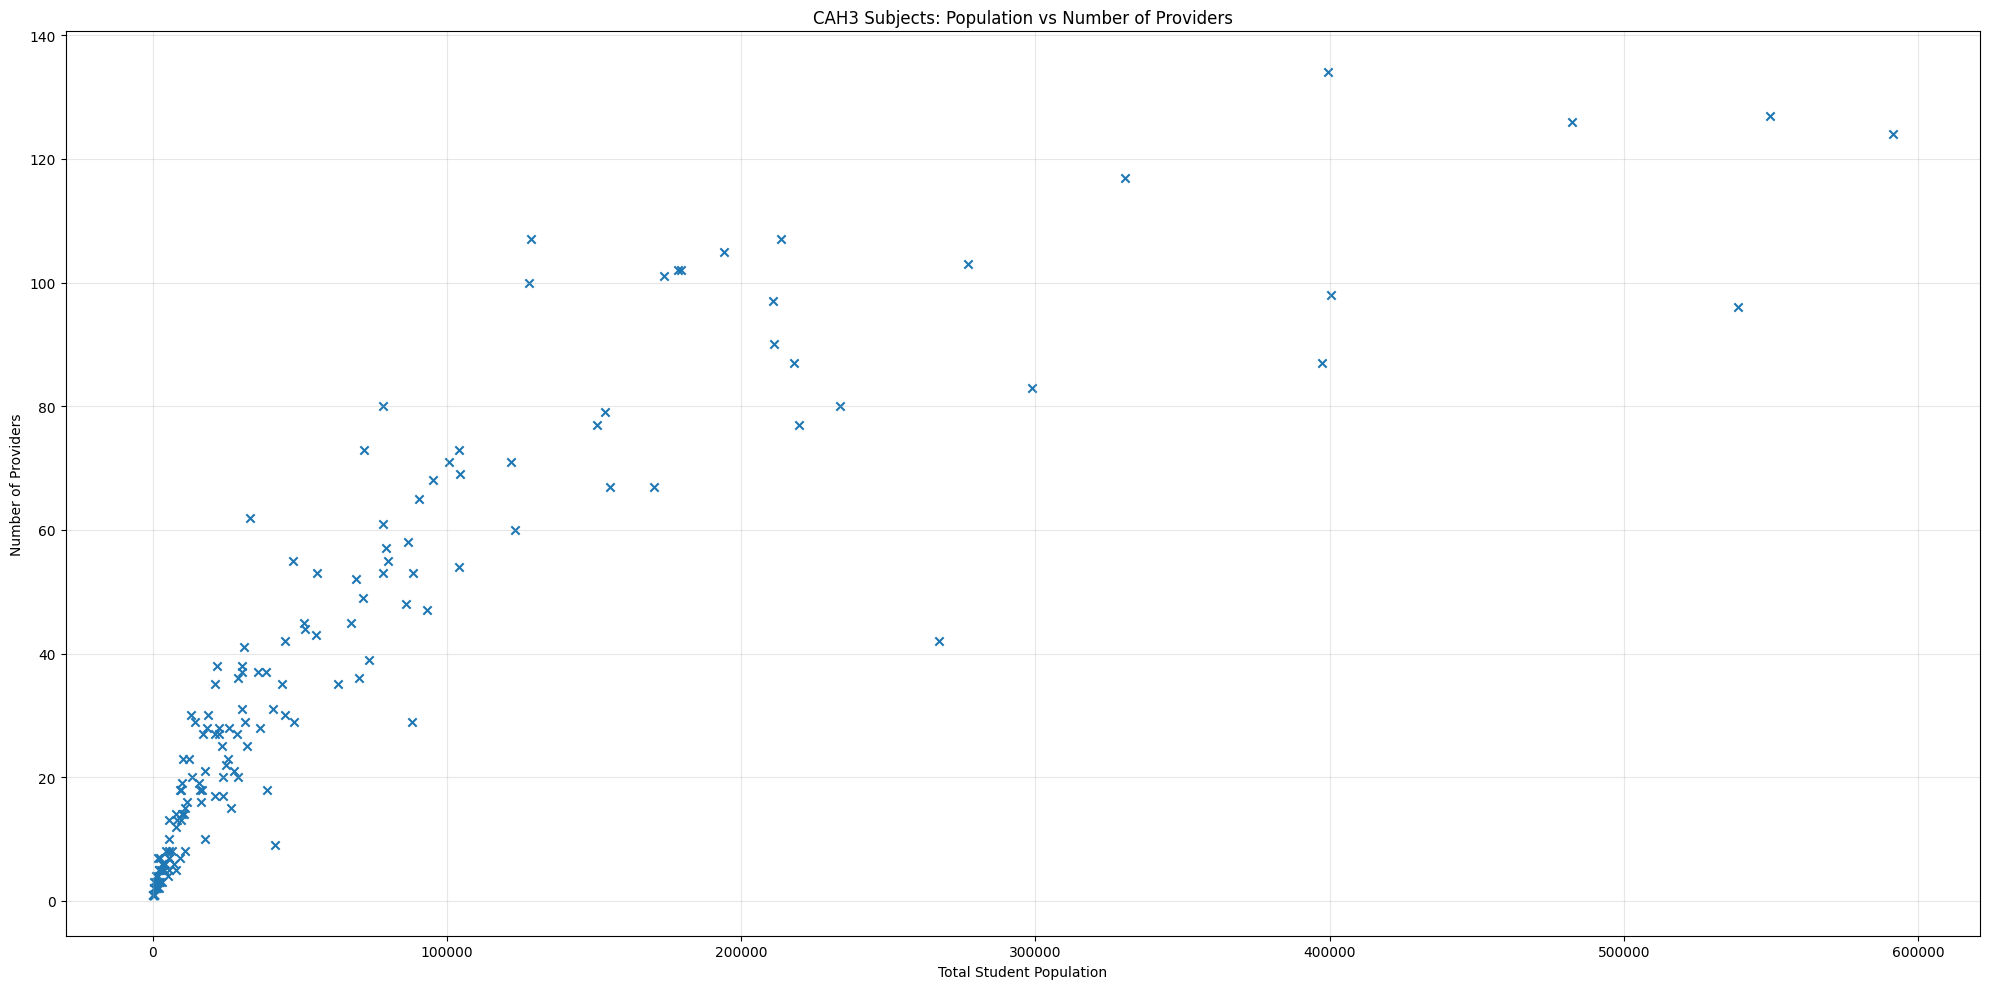

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("nss2025.csv")

# ---- Aggregate by CAH1 subject ----
cah1_summary = (
    df
    .groupby(["cah3_code", "cah3_subject"], as_index=False)
    .agg(
        population=("population", "sum"),
        num_providers=("provider", "nunique")
       
    )
    .sort_values(by="population", ascending=False)
)# Exclude top 2 online providers

# ---- Scatter plot ----
plt.figure(figsize=(20, 10))

plt.scatter(
    cah1_summary["population"],     # X axis: population
    cah1_summary["num_providers"],  # Y axis: provider count

    marker="x"
)
plt.xlabel("Total Student Population")
plt.ylabel("Number of Providers")
plt.title("CAH1 Subjects: Population vs Number of Providers")

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


160
Total CAH3 Subjects: 16


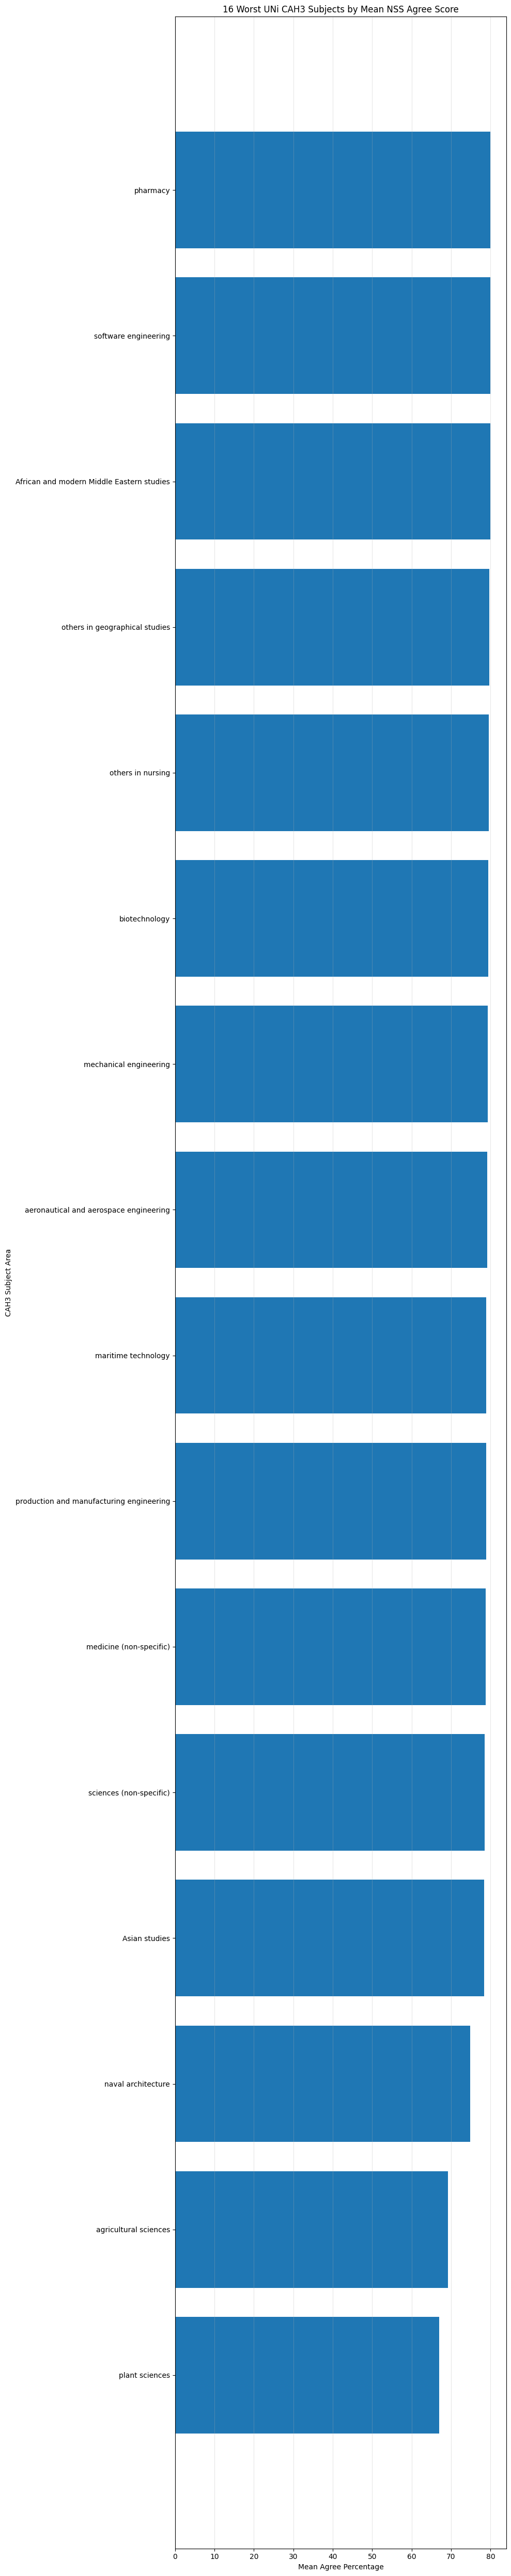

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("nss2025.csv")

# ---- Aggregate by subject ----
cah1_summary = (
    df
    .groupby(["cah3_code", "cah3_subject"], as_index=False)
    .agg(
        mean_agree_pct=("agree_pct", "mean")
    )
)

print(len(cah1_summary))


totalSubjects = (int(len(cah1_summary) *0.1))
print("Total CAH3 Subjects:", totalSubjects)

# ---- 50 WORST subjects ----
worst_50 = (
    cah1_summary
    .sort_values("mean_agree_pct", ascending=True)
    .head(totalSubjects)
)

# Sort for plotting
worst_50 = worst_50.sort_values("mean_agree_pct", ascending=True)

# ---- Plot ----
plt.figure(figsize=(10, 50))

plt.barh(
    worst_50["cah3_subject"],
    worst_50["mean_agree_pct"]
)

plt.xlabel("Mean Agree Percentage")
plt.ylabel("CAH3 Subject Area")
plt.title(f"{totalSubjects} Worst UNi CAH3 Subjects by Mean NSS Agree Score")

plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()


84
Total CAH3 Subjects: 84


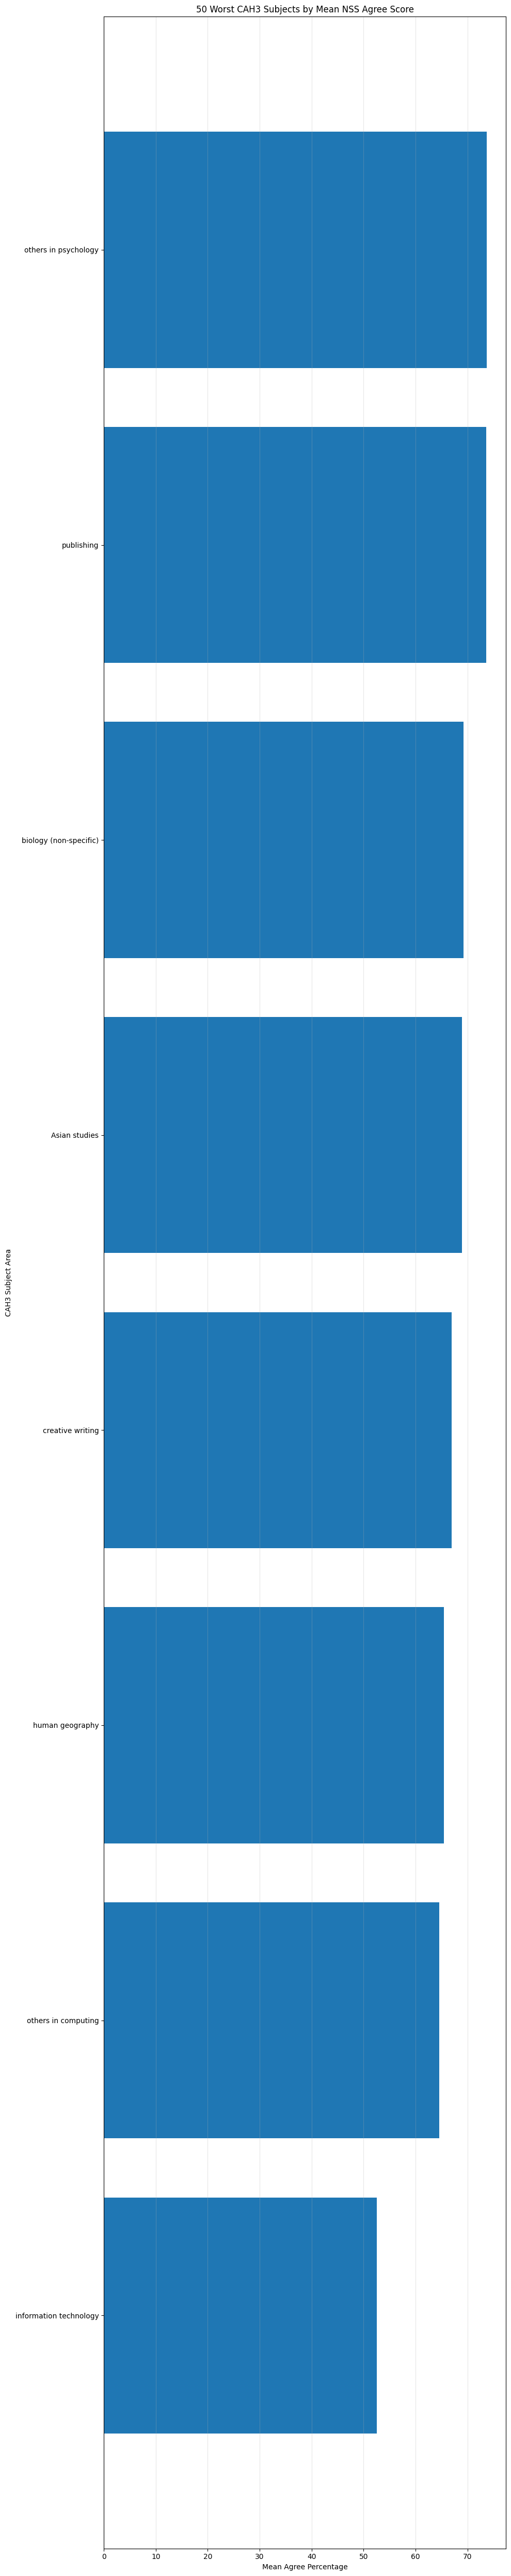

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("FEHE.csv")

# ---- Aggregate by subject ----
cah1_summary = (
    df
    .groupby(["cah3_code", "cah3_subject"], as_index=False)
    .agg(
        mean_agree_pct=("agree_pct", "mean")
    )
)

print(len(cah1_summary))


bottomTen = int(len(cah1_summary) *0.1)


totalSubjects = len(cah1_summary)
print("Total CAH3 Subjects:", totalSubjects)

# ---- 50 WORST subjects ----
worst_50 = (
    cah1_summary
    .sort_values("mean_agree_pct", ascending=True)
    .head(bottomTen)
)

# Sort for plotting
worst_50 = worst_50.sort_values("mean_agree_pct", ascending=True)

# ---- Plot ----
plt.figure(figsize=(10, 50))

plt.barh(
    worst_50["cah3_subject"],
    worst_50["mean_agree_pct"]
)

plt.xlabel("Mean Agree Percentage")
plt.ylabel("CAH3 Subject Area")
plt.title(f"{bottomTen} Worst CAH3 Subjects by Mean NSS Agree Score")

plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()


160
Total CAH3 Subjects: 16


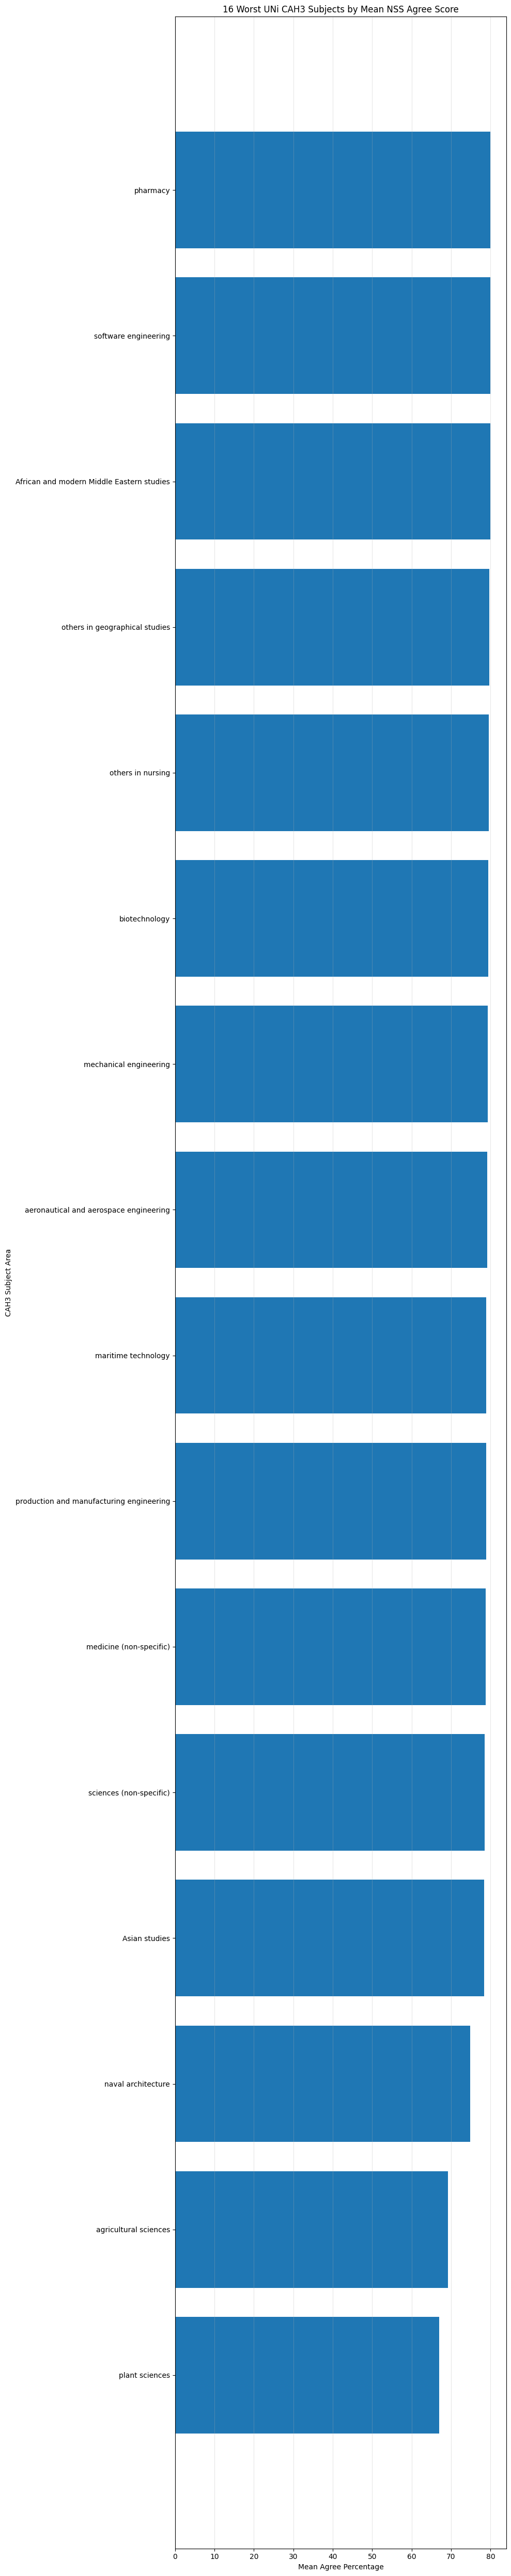

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("nss2025.csv")

# ---- Aggregate by subject ----
cah1_summary = (
    df
    .groupby(["cah3_code", "cah3_subject"], as_index=False)
    .agg(
        mean_agree_pct=("agree_pct", "mean")
    )
)

print(len(cah1_summary))


totalSubjects = (int(len(cah1_summary) *0.1))
print("Total CAH3 Subjects:", totalSubjects)

# ---- 50 WORST subjects ----
worst_50 = (
    cah1_summary
    .sort_values("mean_agree_pct", ascending=True)
    .head(totalSubjects)
)

# Sort for plotting
worst_50 = worst_50.sort_values("mean_agree_pct", ascending=True)

# ---- Plot ----
plt.figure(figsize=(10, 50))

plt.barh(
    worst_50["cah3_subject"],
    worst_50["mean_agree_pct"]
)

plt.xlabel("Mean Agree Percentage")
plt.ylabel("CAH3 Subject Area")
plt.title(f"{totalSubjects} Worst UNi CAH3 Subjects by Mean NSS Agree Score")

plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Sort this regarding the student poplaution 
# then cha2 sub subjects
# then popluaitons 
# find the subjects which are diffrent betwqeen the uni and hefe 

In [14]:
#Diffrent siubjects between uni and hefe

import pandas as pd
import matplotlib.pyplot as plt
# Load data
onlyUni = pd.read_csv("onlyUni.csv")


onlyUni = onlyUni[["cah3_code", "cah3_subject"]].drop_duplicates()


listUniSubjects = onlyUni["cah3_subject"].tolist()

print("Total Uni Subjects:", len(listUniSubjects))
print(listUniSubjects)



onlyFEHE= pd.read_csv("FEHE.csv")

onlyFEHE = onlyFEHE[["cah3_code", "cah3_subject"]].drop_duplicates()


listFEHESubjects = onlyFEHE["cah3_subject"].tolist()

print("Total FEHE Subjects:", len(listFEHESubjects))
print(listFEHESubjects)



diffSubjects = set(listUniSubjects) - set(listFEHESubjects)

print("Subjects in Uni but not in FEHE:", len(diffSubjects))
print(diffSubjects)


diffSubjects2 =  set(listFEHESubjects) - set(listUniSubjects)

print("Subjects in FEHE but not in Uni:", len(diffSubjects2))
print(diffSubjects2)

Total Uni Subjects: 159
['mental health nursing', 'biomedical sciences (non-specific)', 'sport and exercise sciences', 'psychology (non-specific)', 'food and beverage studies (non-specific)', 'forensic and archaeological sciences', 'software engineering', 'computer games and animation', 'others in computing', 'sociology', 'law', 'business and management (non-specific)', 'marketing', 'tourism, transport and travel', 'accounting', 'design studies', 'medicine (non-specific)', 'pharmacology', 'nursing (non-specific)', 'adult nursing', 'midwifery', "children's nursing", 'health sciences (non-specific)', 'ophthalmics', 'environmental and public health', 'ecology and environmental biology', 'zoology', 'others in veterinary sciences', 'animal science', 'mechanical engineering', 'civil engineering', 'electrical and electronic engineering', 'computer science', 'artificial intelligence', 'architecture', 'building', 'social work', 'childhood and youth studies', 'business studies', 'management stud

159
Total CAH3 Subjects: 15


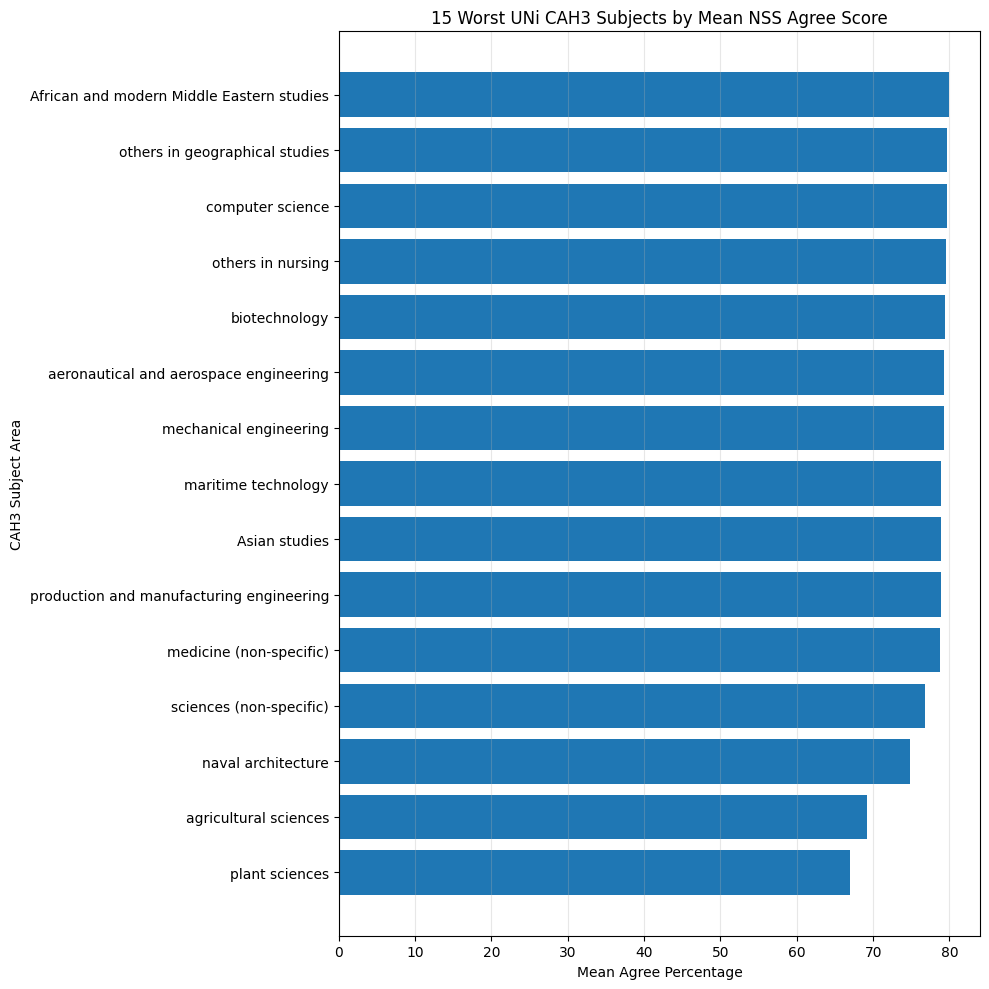

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("onlyUni.csv")

# ---- Aggregate by subject ----
cah1_summary = (
    df
    .groupby(["cah3_code", "cah3_subject"], as_index=False)
    .agg(
        mean_agree_pct=("agree_pct", "mean")
    )
)

print(len(cah1_summary))


totalSubjects = (int(len(cah1_summary) *0.05))
print("Total CAH3 Subjects:", totalSubjects)

# ---- 50 WORST subjects ----x
worst_50 = (
    cah1_summary
    .sort_values("mean_agree_pct", ascending=True)
    .head(totalSubjects)
)

# Sort for plotting
worst_50 = worst_50.sort_values("mean_agree_pct", ascending=True)

# ---- Plot ----
plt.figure(figsize=(10, 10))

plt.barh(
    worst_50["cah3_subject"],
    worst_50["mean_agree_pct"]
)

plt.xlabel("Mean Agree Percentage")
plt.ylabel("CAH3 Subject Area")
plt.title(f"{totalSubjects} Worst UNi CAH3 Subjects by Mean NSS Agree Score")

plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("onlyUni.csv")

# ---- Aggregate by subject ----
cah1_summary = (
    df
    .groupby(["cah3_code", "cah3_subject"], as_index=False)
    .agg(mean_agree_pct=("agree_pct", "mean"))
)

print(len(cah1_summary))

totalSubjects = int(len(cah1_summary) * 0.1)
print("Total CAH3 Subjects:", totalSubjects)

# ---- Worst 10% subjects ----
worst_50 = (
    cah1_summary
    .sort_values("mean_agree_pct", ascending=True)
    .head(totalSubjects)
)

# ---- Population for worst subjects ----
worst_subjects = worst_50["cah3_subject"]

sortedPop = (
    df[df["cah3_subject"].isin(worst_subjects)]
    .groupby("cah3_subject", as_index=False)
    .agg(
        sum_unique_population=("population", lambda x: sum(set(x)))
    )
    .sort_values("sum_unique_population", ascending=False)
)

print(sortedPop)


159
Total CAH3 Subjects: 15
                                 cah3_subject  sum_unique_population
5                            computer science                  12317
8                     medicine (non-specific)                   9368
7                      mechanical engineering                   4765
2      aeronautical and aerospace engineering                   2466
13   production and manufacturing engineering                   1072
1                               Asian studies                    507
6                         maritime technology                    194
4                               biotechnology                    102
0   African and modern Middle Eastern studies                     99
11                          others in nursing                     51
9                          naval architecture                     46
14                    sciences (non-specific)                     19
3                       agricultural sciences                     13
12    

In [22]:
import pandas as pd

df = pd.read_csv("nss2025.csv")

# ---- Aggregate by subject (MEAN SD) ----

cah3_summary = (
    df
    .groupby(["cah3_code", "cah3_subject"], as_index=False)
    .agg(mean_sd=("agree_pct_sd", "mean"))

)

totalSubjects = max(1, int(len(cah3_summary) * 0.10))

# ---- Worst 10% = HIGHEST SD ----
worst_10pct = (
    cah3_summary
    .sort_values("mean_sd", ascending=True)  # <-- FIX HERE
    .head(totalSubjects)
)



print(worst_10pct)




       cah3_code                            cah3_subject   mean_sd
42   CAH05-01-01       veterinary medicine and dentistry  2.734156
1    CAH01-01-02                 medicine (non-specific)  3.105115
8    CAH02-04-02                           adult nursing  3.923296
6    CAH02-02-03                                pharmacy  4.164112
100  CAH16-01-01                                     law  4.245699
3    CAH01-01-04                               dentistry  4.727984
37   CAH04-01-01               psychology (non-specific)  4.793474
135  CAH22-01-02                        teacher training  4.930310
36   CAH03-02-01             sport and exercise sciences  5.025566
90   CAH15-01-02                               sociology  5.350871
85   CAH13-01-01                            architecture  5.370247
96   CAH15-03-01                                politics  5.397731
21   CAH02-06-03                             ophthalmics  5.415062
17   CAH02-05-03      biomedical sciences (non-specific)  5.41